In [1]:
import numpy as np
import os
import mne
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import osl
import yaml

In [2]:
raw_fif = mne.io.read_raw_fif('/well/woolrich/projects/cichy118_cont/raw_data/subj02/MEG2_subj02_sess01_tsss_mc-0.fif',
                              preload=True)

Opening raw data file /well/woolrich/projects/cichy118_cont/raw_data/subj02/MEG2_subj02_sess01_tsss_mc-0.fif...
    Range : 48000 ... 1639999 =     48.000 ...  1639.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/raw_data/subj02/MEG2_subj02_sess01_tsss_mc-1.fif...


<ipython-input-2-fa4985b0a96e>:1: RuntimeWarning: This filename (/well/woolrich/projects/cichy118_cont/raw_data/subj02/MEG2_subj02_sess01_tsss_mc-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_fif = mne.io.read_raw_fif('/well/woolrich/projects/cichy118_cont/raw_data/subj02/MEG2_subj02_sess01_tsss_mc-0.fif',


    Range : 1640000 ... 3231999 =   1640.000 ...  3231.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/raw_data/subj02/MEG2_subj02_sess01_tsss_mc-2.fif...
    Range : 3232000 ... 4823999 =   3232.000 ...  4823.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/raw_data/subj02/MEG2_subj02_sess01_tsss_mc-3.fif...
    Range : 4824000 ... 5231999 =   4824.000 ...  5231.999 secs
Ready.
Reading 0 ... 5183999  =      0.000 ...  5183.999 secs...


In [25]:
raw_fif.info

<Info | 24 non-empty values
 acq_pars: ACQactiveGround 1 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: MEG0111, MEG0112, MEG0113, MEG0121, MEG0122, MEG0123, MEG0131, ...
 chs: 102 MAG, 204 GRAD, 6 MISC, 1 STIM, 1 SYST, 9 CHPI
 custom_ref_applied: False
 description: TRIUX system
 dev_head_t: MEG device -> head transform
 dig: 63 items (3 Cardinal, 5 HPI, 55 Extra)
 events: 1 item (list)
 experimenter: Dimitrios Pantazis (pantazis)
 file_id: 4 items (dict)
 gantry_angle: 68.0
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 60.0
 lowpass: 330.0 Hz
 meas_date: 2014-03-31 16:14:52 UTC
 meas_id: 4 items (dict)
 nchan: 323
 proc_history: 1 item (list)
 proj_id: 1 item (ndarray)
 proj_name: meg_two
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 7 items (dict)
>

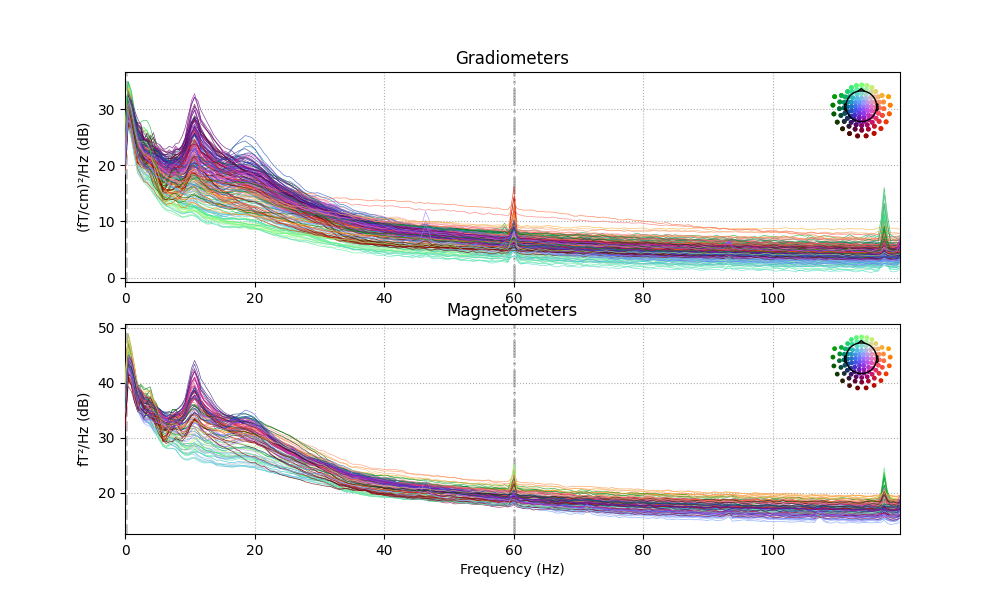

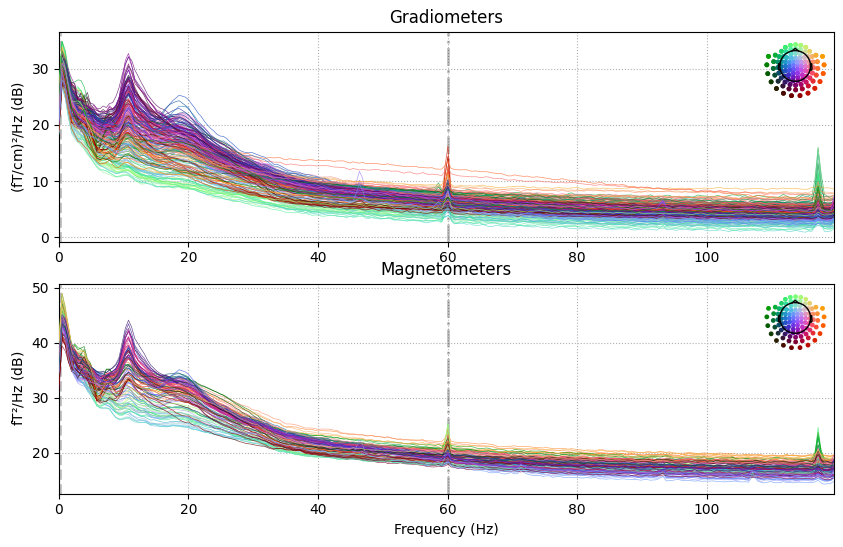

In [24]:
# plot psd of raw_fif
raw_fif.plot_psd(fmax=120)

In [2]:
# preprocess the data
config_text = """
meta:
  event_codes:
preproc:
  - filter:         {l_freq: 0.1, h_freq: 99.9}
  - notch_filter:   {freqs: 60 120}
  - bad_channels:   {picks: 'mag'}
  - bad_channels:   {picks: 'grad'}
  - ica_raw:        {picks: 'meg', n_components: 64}
"""

outdir = "/well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1"

osl_outdir = os.path.join(outdir, 'oslpy')
report_dir = os.path.join(osl_outdir, 'report')
os.makedirs(report_dir, exist_ok=True)

In [3]:
config = yaml.load(config_text, Loader=yaml.FullLoader)
path = '/well/woolrich/projects/cichy118_cont/raw_data/subj02/MEG2_subj02_sess01_tsss_mc-0.fif'
dataset = osl.preprocessing.run_proc_chain(config, path, gen_report=False, outdir=osl_outdir, overwrite=True)


MEG2_subj02_sess01_tsss_mc-0 : OSL osl_logger: handler 'console' level set to 'INFO'
MEG2_subj02_sess01_tsss_mc-0 : logging to file: /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/logs/MEG2_subj02_sess01_tsss_mc-0_preproc_raw.log
MEG2_subj02_sess01_tsss_mc-0 : 2022-10-12 13:59:16 : Starting OSL Processing
MEG2_subj02_sess01_tsss_mc-0 : input : /well/woolrich/projects/cichy118_cont/raw_data/subj02/MEG2_subj02_sess01_tsss_mc-0.fif
MEG2_subj02_sess01_tsss_mc-0 : IMPORTING: /well/woolrich/projects/cichy118_cont/raw_data/subj02/MEG2_subj02_sess01_tsss_mc-0.fif
MEG2_subj02_sess01_tsss_mc-0 : Detected fif file format, using: mne.io.read_raw_fif


/gpfs2/well/woolrich/users/yaq921/oslpy/osl/preprocessing/batch.py:104: RuntimeWarning: This filename (/well/woolrich/projects/cichy118_cont/raw_data/subj02/MEG2_subj02_sess01_tsss_mc-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(infile, preload=preload)


MEG2_subj02_sess01_tsss_mc-0 : MNE Stage - raw.filter
MEG2_subj02_sess01_tsss_mc-0 : userargs: {'l_freq': 0.1, 'h_freq': 99.9}
MEG2_subj02_sess01_tsss_mc-0 : MNE Stage - raw.notch_filter
MEG2_subj02_sess01_tsss_mc-0 : userargs: {'freqs': '60 120'}
MEG2_subj02_sess01_tsss_mc-0 : OSL Stage - raw : detect_badchannels
MEG2_subj02_sess01_tsss_mc-0 : userargs: {'picks': 'mag'}
MEG2_subj02_sess01_tsss_mc-0 : Modality mag - 0/102 channels rejected     (0.000000%)
MEG2_subj02_sess01_tsss_mc-0 : OSL Stage - raw : detect_badchannels
MEG2_subj02_sess01_tsss_mc-0 : userargs: {'picks': 'grad'}
MEG2_subj02_sess01_tsss_mc-0 : Modality grad - 0/204 channels rejected     (0.000000%)
MEG2_subj02_sess01_tsss_mc-0 : MNE Stage - mne.preprocessing.ICA
MEG2_subj02_sess01_tsss_mc-0 : userargs: {'picks': 'meg', 'n_components': 64}
MEG2_subj02_sess01_tsss_mc-0 : 2022-10-12 14:23:08 : Processing Complete


In [4]:
raw_proc = dataset['raw']
ica = dataset['ica']

In [20]:
ica.exclude = [1, 2, 4, 7, 29]

In [5]:
ica_sources = ica.get_sources(raw_proc).get_data()

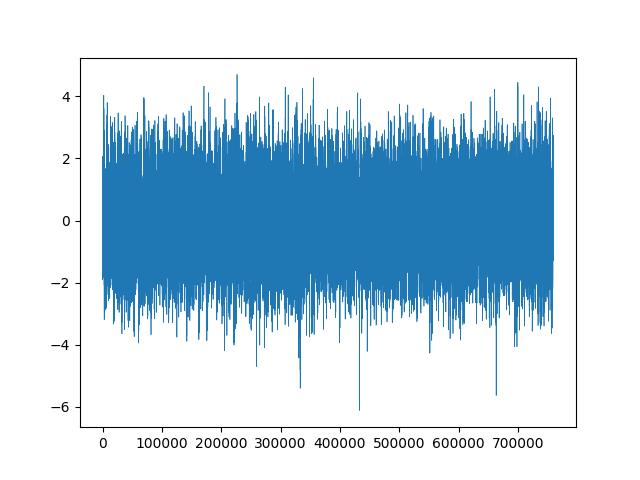

In [19]:
%matplotlib widget
plt.plot(ica_sources[54][40000:800000], linewidth=0.5)

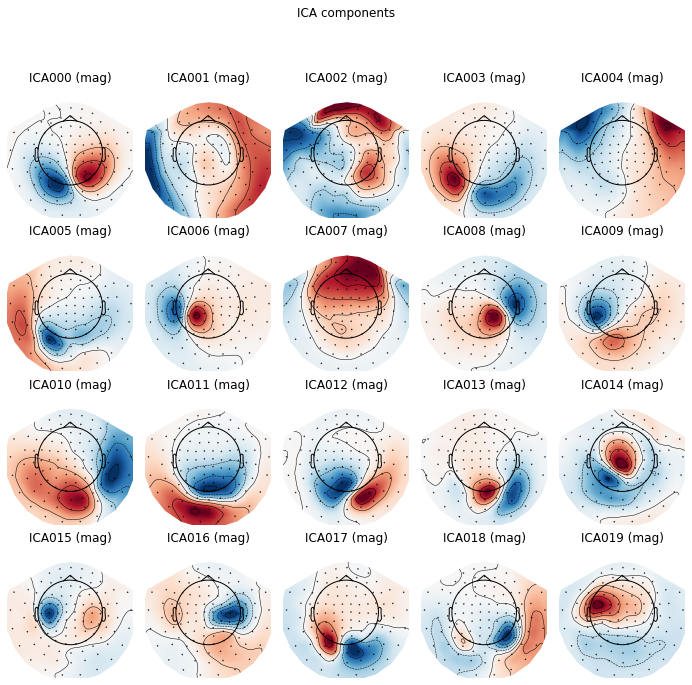

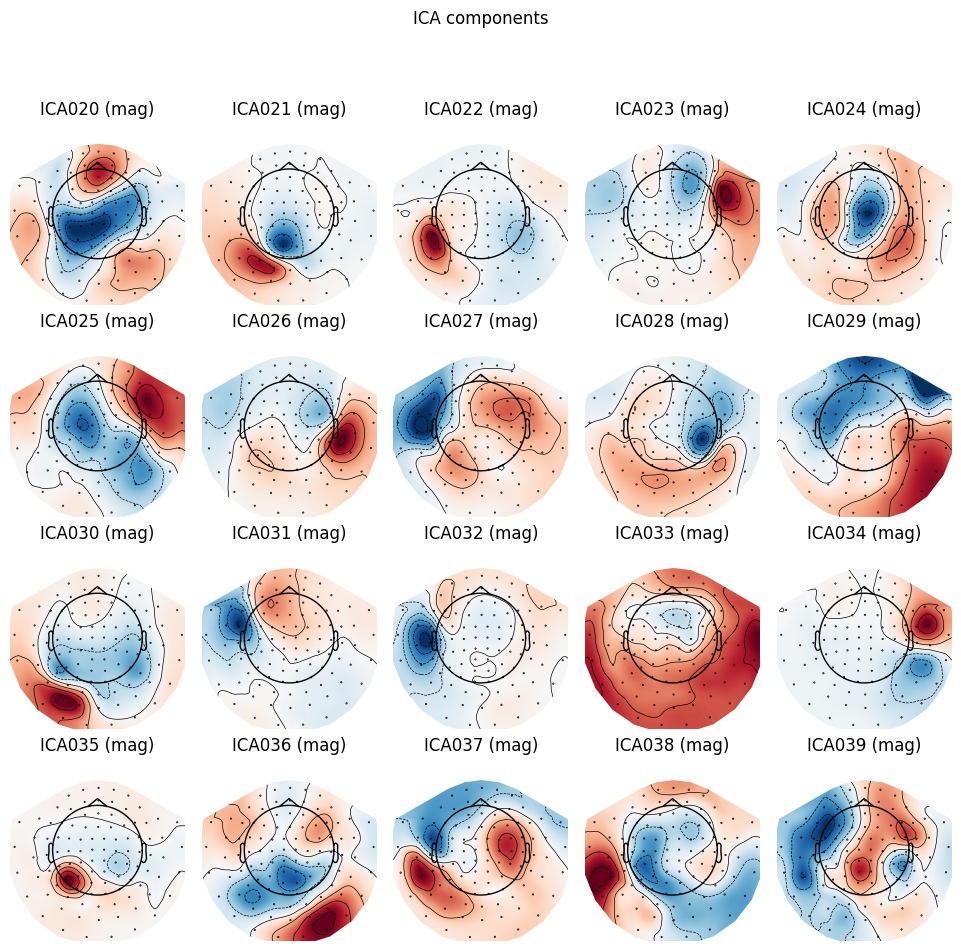

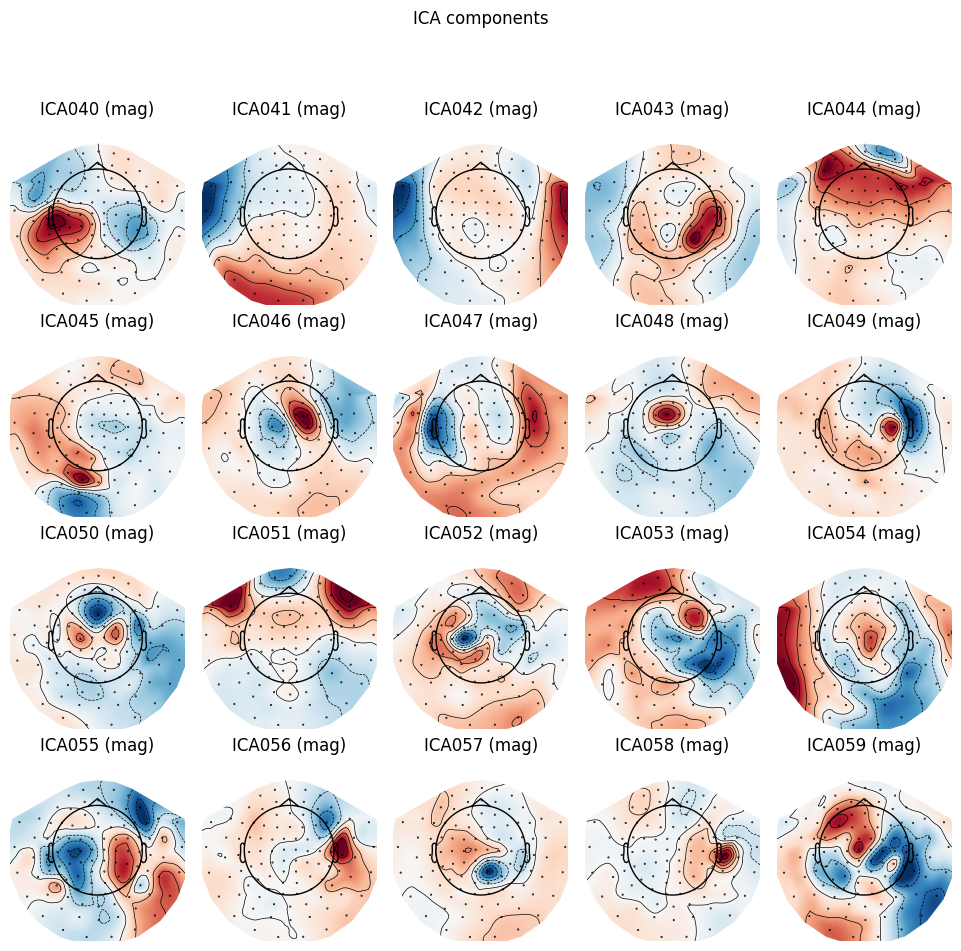

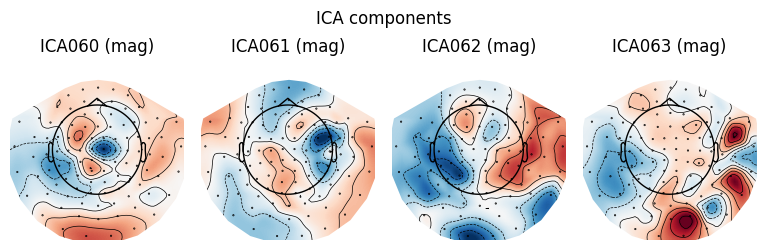

[<MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 780x260.5 with 4 Axes>]

In [6]:
ica.plot_components()

In [21]:
# apply ICA
ica.apply(raw_proc)

<Raw | MEG2_subj02_sess01_tsss_mc-0.fif, 323 x 5184000 (5184.0 s), ~12.48 GB, data loaded>

In [22]:
# save raw data
path = '/well/woolrich/projects/cichy118_cont/preproc_data_osl/'
path += 'subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw.fif'
raw_proc.save(path, overwrite=True)

In [23]:
# save ica
path = '/well/woolrich/projects/cichy118_cont/preproc_data_osl/'
path += 'subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_ica.fif'
ica.save(path, overwrite=True)

<ICA | raw data decomposition, method: fastica (fit in 92 iterations on 5184000 samples), 64 ICA components explaining 99.6 % of variance (306 PCA components available), channel types: mag, grad, 5 sources marked for exclusion>

In [47]:
# save raw in numpy array
path = '/well/woolrich/projects/cichy118_cont/preproc_data_osl/'
path += 'subj1/subj1.npy'
np.save(path, raw_proc.pick_types(meg=True).get_data())

In [5]:
# read ica
path = '/well/woolrich/projects/cichy118_cont/preproc_data_osl/'
path += 'subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_ica.fif'
ica = mne.preprocessing.read_ica(path)

Reading /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_ica.fif ...
Now restoring ICA solution ...
Ready.


In [3]:
# generate osl report from loaded fif data
path = '/well/woolrich/projects/cichy118_cont/preproc_data_osl/'
path += 'subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw.fif'
report = osl.report.gen_report_from_fif([path], outdir=report_dir)

Generating report for /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw.fif
Loading dataset:
Reading /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw.fif
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw.fif...
    Range : 48000 ... 1703999 =     48.000 ...  1703.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw-1.fif...
    Range : 1704000 ... 3359999 =   1704.000 ...  3359.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw-2.fif...
    Range : 3360000 ... 5015999 =   3360.000 ...  5015.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_se

/gpfs2/well/woolrich/users/yaq921/oslpy/osl/report/raw_report.py:353: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/gpfs2/well/woolrich/users/yaq921/oslpy/osl/report/raw_report.py:359: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(figname, dpi=150, transparent=True)


Omitting 215999 of 5184000 (4.17%) samples, retaining 4968001 (95.83%) samples.
Omitting 215999 of 5184000 (4.17%) samples, retaining 4968001 (95.83%) samples.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.1s finished


*************************************************************************************
* REPORT: /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/report *
*************************************************************************************


In [3]:
# load raw data
path = '/well/woolrich/projects/cichy118_cont/preproc_data_osl/'
path += 'subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw.fif'
raw = mne.io.read_raw_fif(path, preload=True)

Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw.fif...
    Range : 48000 ... 1703999 =     48.000 ...  1703.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw-1.fif...
    Range : 1704000 ... 3359999 =   1704.000 ...  3359.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw-2.fif...
    Range : 3360000 ... 5015999 =   3360.000 ...  5015.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw-3.fif...
    Range : 5016000 ... 5231999 =   5016.000 ...  5231.999 secs
Ready.
Reading 0 ... 5183999  =      0.000 ...  5183.999 secs...


Effective window size : 10.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.5s finished


Effective window size : 10.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.9s finished


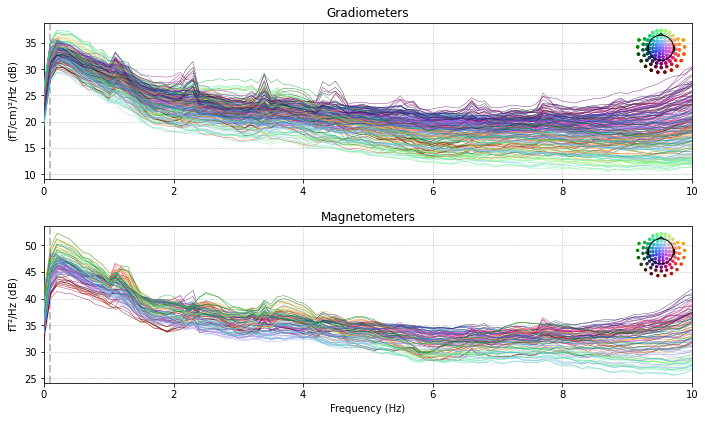

In [3]:
raw_fif.plot_psd(fmax=10, n_fft=10000)
e=0

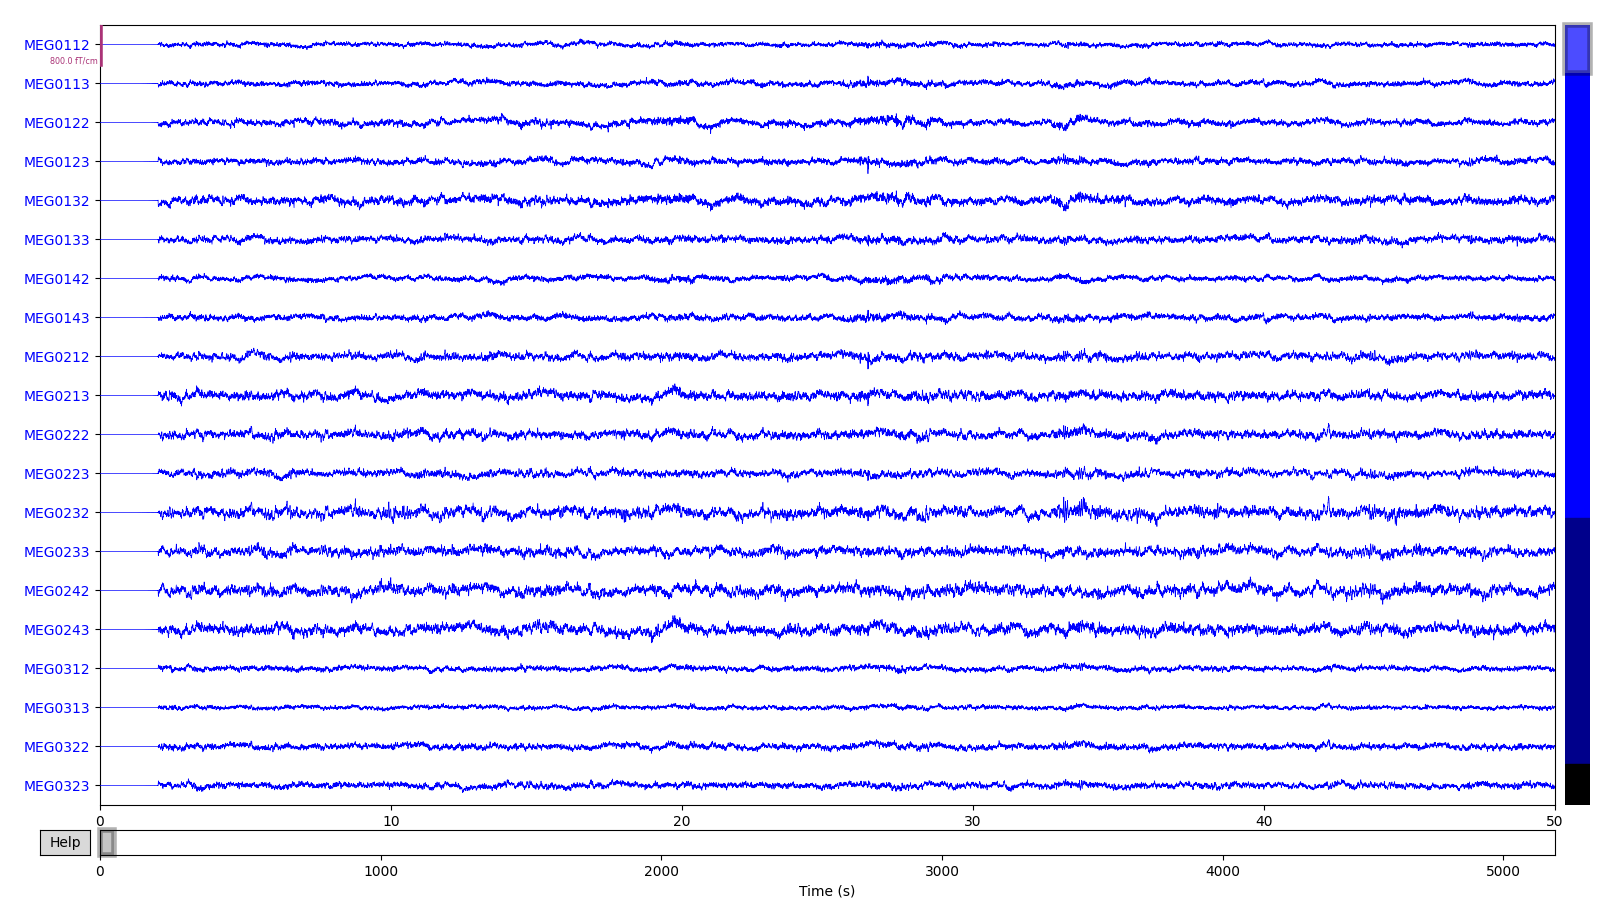

In [11]:
%matplotlib widget
raw.plot(n_channels=20, duration=50)
e=0